Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Dataset: 50000 rows y 25 columns.
--- Missing values summary ---
                               Null values  Porcentage (%)
Social_Media_Engagement_Score         6000          12.000
Credit_Balance                        5500          11.000
Mobile_App_Usage                      5000          10.000
Returns_Rate                          4491           8.982
Wishlist_Items                        4000           8.000
Product_Reviews_Written               3500           7.000
Discount_Usage_Rate                   3500           7.000
Session_Duration_Avg                  3399           6.798
Pages_Per_Session                     3000           6.000
Days_Since_Last

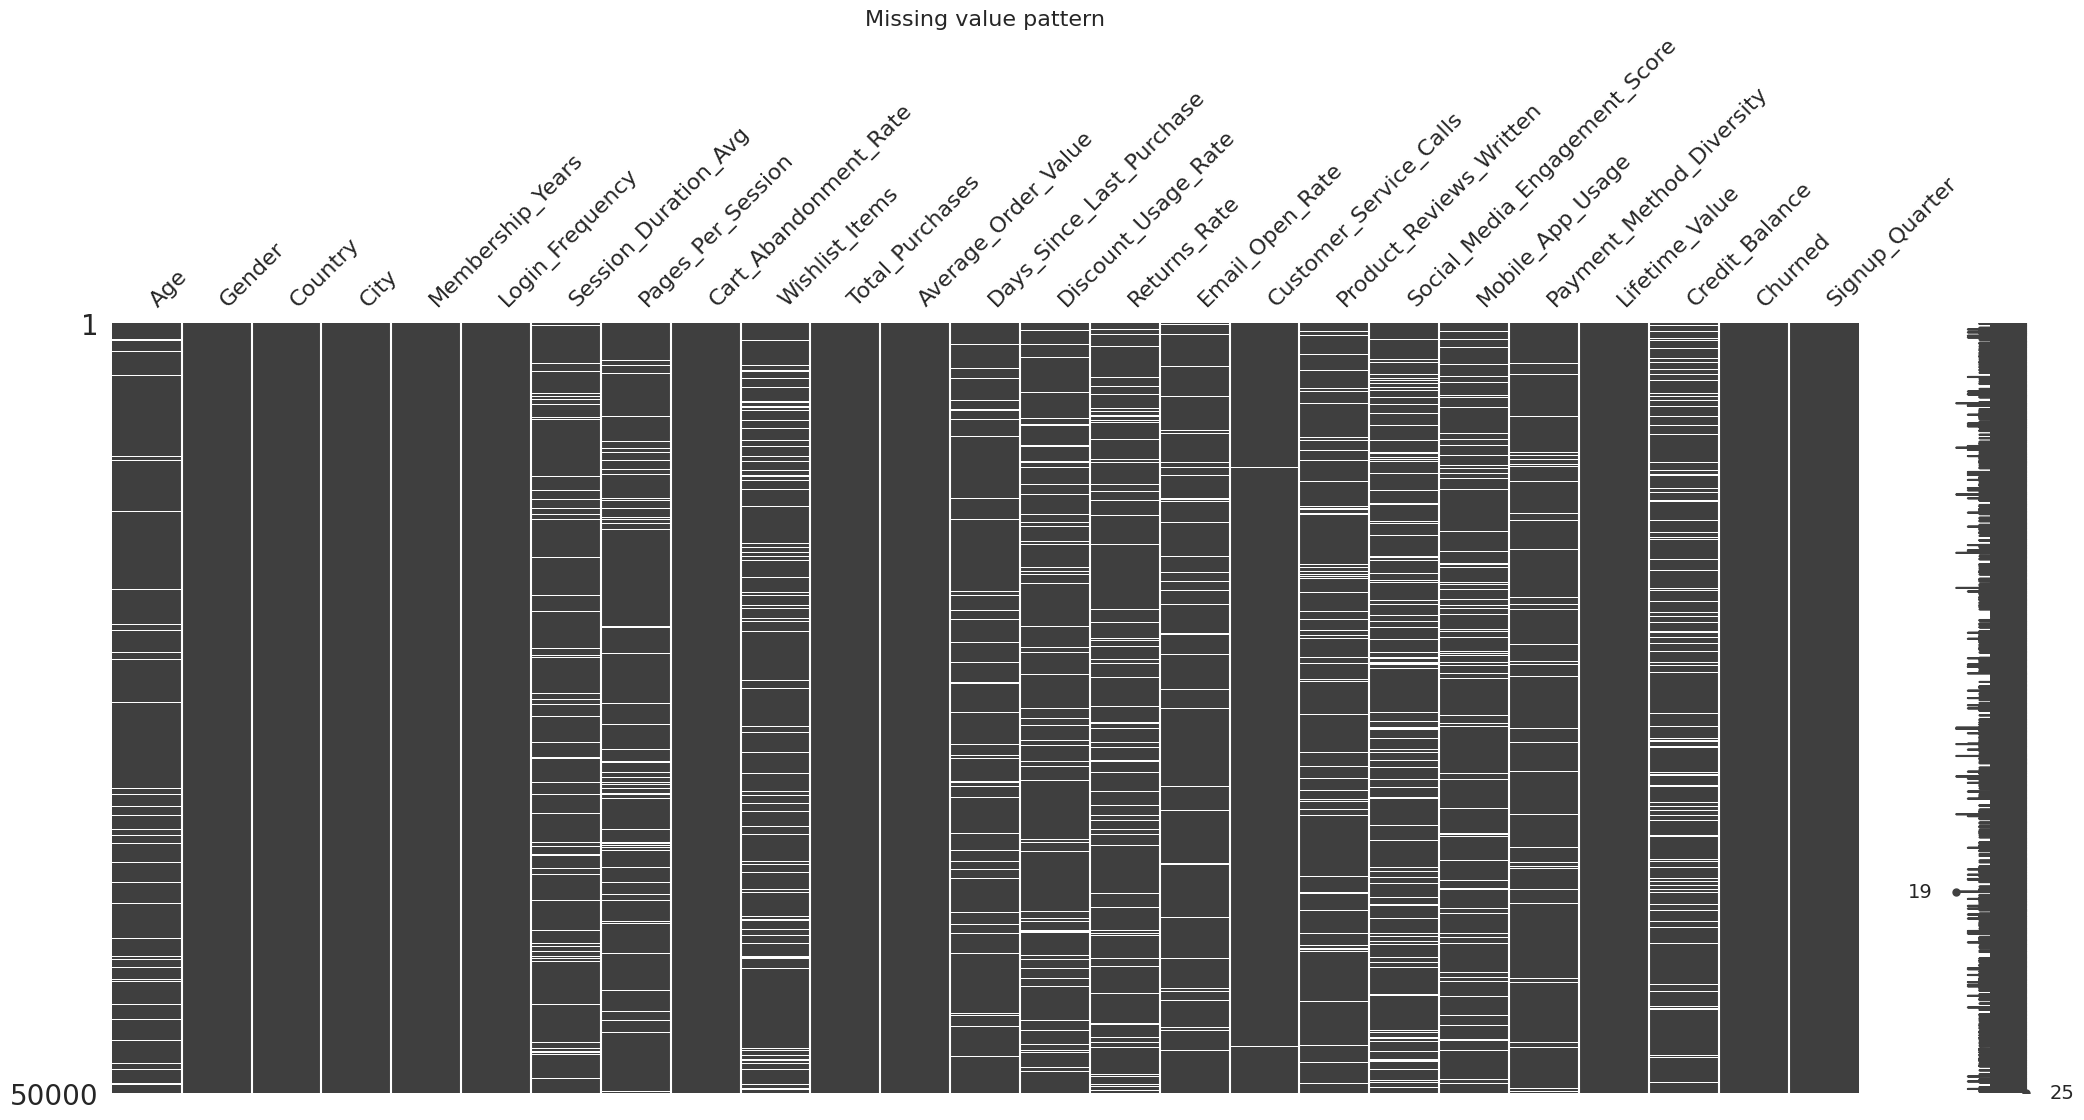

--- Descriptive statistics (Numeric) ---


,count,mean,std,min,25%,50%,75%,max
Age,47505.0,37.802968,11.834668,5.00,29.0000,38.000,46.00,200.000000
Membership_Years,50000.0,2.984009,2.059105,0.10,1.4000,2.500,4.00,10.000000
Login_Frequency,50000.0,11.624660,7.810657,0.00,6.0000,11.000,17.00,46.000000
Session_Duration_Avg,46601.0,27.660754,10.871013,1.00,19.7000,26.800,34.70,75.600000
Pages_Per_Session,47000.0,8.737811,3.778220,1.00,6.0000,8.400,11.20,24.100000
Cart_Abandonment_Rate,50000.0,57.079973,16.282723,0.00,46.4000,58.100,68.70,143.743350
Wishlist_Items,46000.0,4.298391,3.189754,0.00,2.0000,4.000,6.00,28.000000
Total_Purchases,50000.0,13.111576,7.017312,-13.00,8.0000,12.000,17.00,128.700000
Average_Order_Value,50000.0,123.117330,175.569714,26.38,87.0500,112.970,144.44,9666.379178
Days_Since_Last_Purchase,47000.0,29.792872,29.695062,0.00,9.0000,21.000,41.00,287.000000



--- Descriptive statistics (Categorical) ---


,count,unique,top,freq
Gender,50000,3,Female,25116
Country,50000,8,USA,17384
City,50000,40,Houston,3549
Signup_Quarter,50000,4,Q3,12558



--- Balance of target variable (Churned) ---
Churned
0    71.1
1    28.9
Name: proportion, dtype: float64


In [1]:
%pip install pandas --quiet
%pip install numpy --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet
%pip install missingno --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Visualization settings
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Dataset
try:
    df = pd.read_csv(r"/workspaces/Ecommerce-Customer-Behavior/ecommerce_customer_churn_dataset.csv")
    print(f"Dataset: {df.shape[0]} rows y {df.shape[1]} columns.")
except FileNotFoundError:
    print("Error: No dataset found.")

# Quick inspection
df.head()

# Analysis of missing values
def analyze_missing_values(df):
    """
    Calculate and visualize the number and porcentage of null values per column.
    """
    null_count = df.isnull().sum()
    null_percentage = (null_count / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Null values': null_count,
        'Porcentage (%)': null_percentage
    }).sort_values(by='Porcentage (%)', ascending=False)
    
    # Filter only columns with missing values
    missing_df = missing_df[missing_df['Null values'] > 0]
    
    print("--- Missing values summary ---")
    print(missing_df if not missing_df.empty else "No missing values.")
    
    # Visualization
    if not missing_df.empty:
        msno.matrix(df)
        plt.title("Missing value pattern", fontsize=16)
        plt.show()

analyze_missing_values(df)

# Descriptive statistics

# Numeric variables: Central tendency and dispersion
print("--- Descriptive statistics (Numeric) ---")
# We use .T (transponer) for better readibility
display(df.describe().T)

# Categorical variables: Frecuencies y cardinal
print("\n--- Descriptive statistics (Categorical) ---")
display(df.describe(include=['object', 'category']).T)

# 3.3 Target variable (Churned)
print("\n--- Balance of target variable (Churned) ---")
print(df['Churned'].value_counts(normalize=True) * 100)

In [2]:
def clean_ecommerce_data(df):
    """
    Performs data cleaning including outlier handling, 
    imputation of missing values, and consistency checks.
    """
    df_clean = df.copy()

    # --- Handling Outliers & Logical Errors ---
    
    # Age: Replace values > 100 with the median
    age_median = df_clean['Age'].median()
    df_clean.loc[df_clean['Age'] > 100, 'Age'] = age_median
    
    # Total_Purchases: Negative values to 0 (assuming they are errors, purchases cannot have negative values)
    df_clean.loc[df_clean['Total_Purchases'] < 0, 'Total_Purchases'] = 0
    
    # Rates: Cap percentage-based columns at 100%
    rate_cols = ['Cart_Abandonment_Rate', 'Discount_Usage_Rate', 'Returns_Rate']
    for col in rate_cols:
        df_clean[col] = df_clean[col].clip(upper=100)

    # --- Imputation of Missing Values ---
    
    # Numerical: Median Imputation
    num_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
            
    # Categorical: Mode Imputation
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    # --- Feature Engineering ---
    
    # Creation of an 'Engagement_Index' to capture overall platform activity
    df_clean['Engagement_Index'] = (df_clean['Login_Frequency'] * df_clean['Session_Duration_Avg']) / 100
    
    # Customer Seniority: If they have 0 Membership_Years, they are 'New'
    df_clean['Is_New_Customer'] = (df_clean['Membership_Years'] < 1).astype(int)

    print("Data cleaning complete. No missing values remain.")
    return df_clean

# Apply the pipeline
df_final = clean_ecommerce_data(df)

# Final check
print(f"Missing values after cleaning: {df_final.isnull().sum().sum()}")

Data cleaning complete. No missing values remain.
Missing values after cleaning: 0


In [3]:
%pip install scipy --quiet

from scipy.stats import ttest_ind, chi2_contingency

def plot_distribution(df, column, title):
    """Plots a histogram and a boxplot for a numerical column."""
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[column], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Distribution of {column}')
    sns.boxplot(x=df[column], ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Outliers in {column}')
    plt.suptitle(title)
    plt.show()

def plot_categorical_vs_target(df, col, target='Churned'):
    """Plots the relationship between a categorical variable and the target."""
    plt.figure(figsize=(12, 6))
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue=target, order=order)
    plt.title(f'{col} Distribution by {target} Status')
    plt.xticks(rotation=45)
    plt.legend(title='Churned', labels=['No', 'Yes'])
    plt.show()

Note: you may need to restart the kernel to use updated packages.


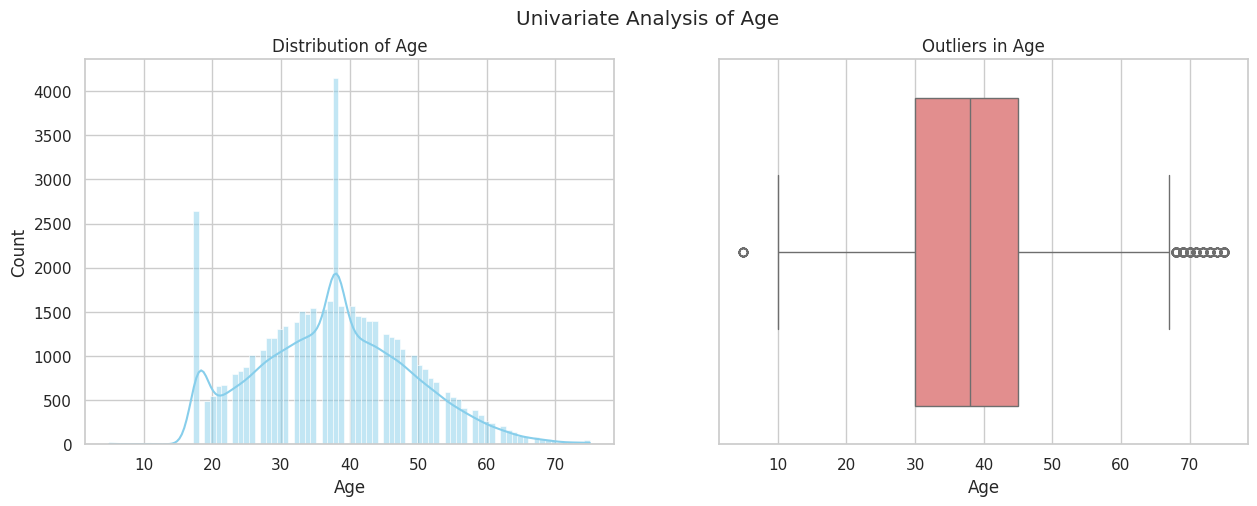

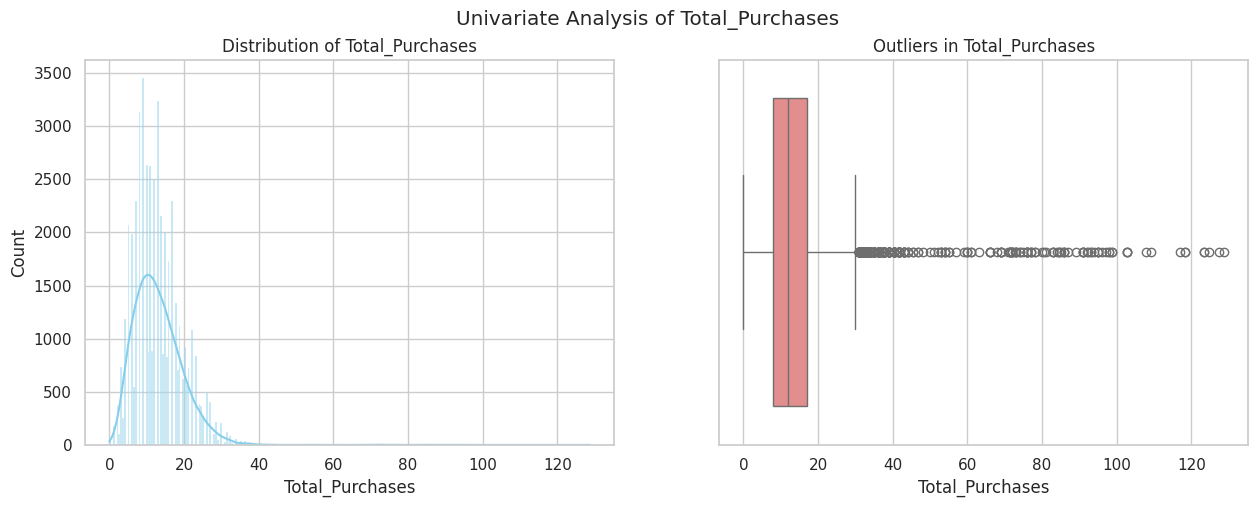

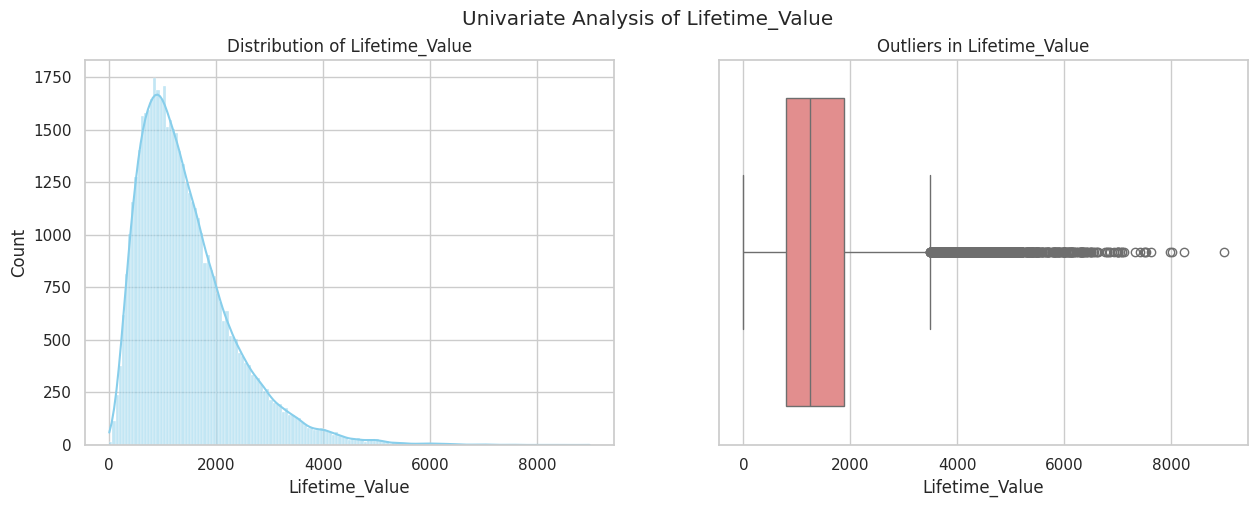

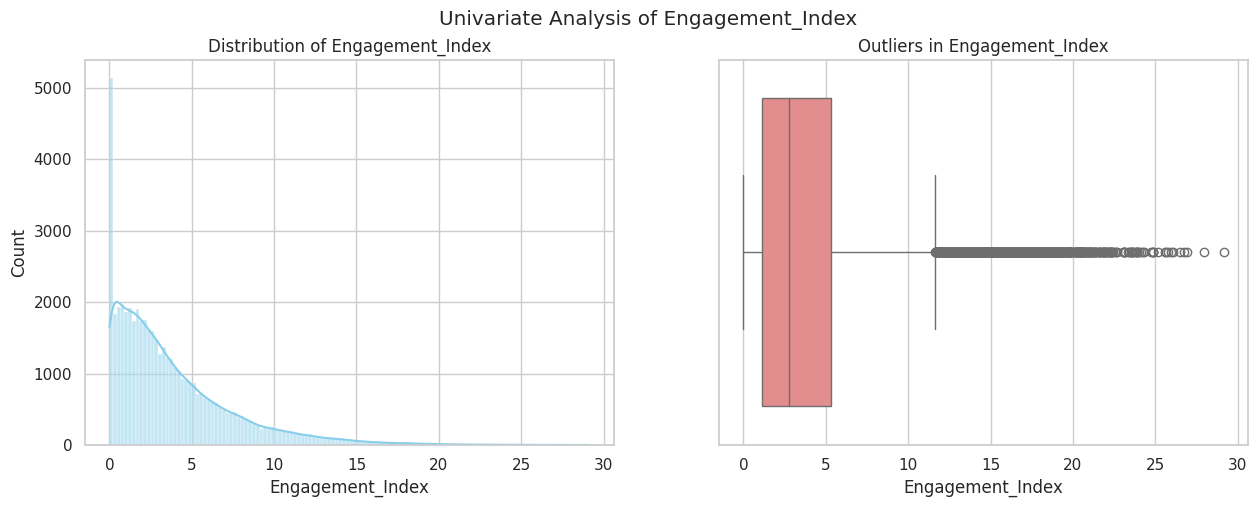

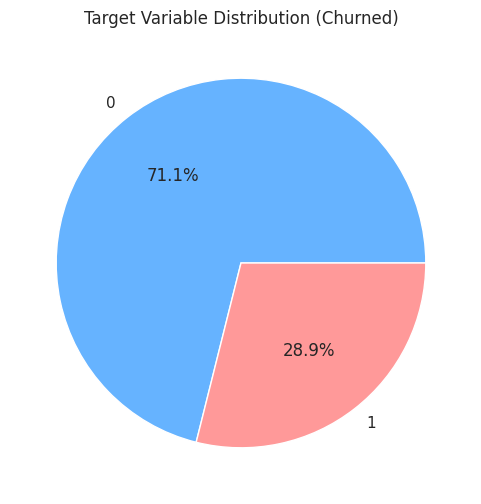

In [4]:
# Analyzing key numerical features
key_nums = ['Age', 'Total_Purchases', 'Lifetime_Value', 'Engagement_Index']
for col in key_nums:
    plot_distribution(df_final, col, f"Univariate Analysis of {col}")

# Analyzing Churn proportion
plt.figure(figsize=(6, 6))
df_final['Churned'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Target Variable Distribution (Churned)')
plt.ylabel('')
plt.show()

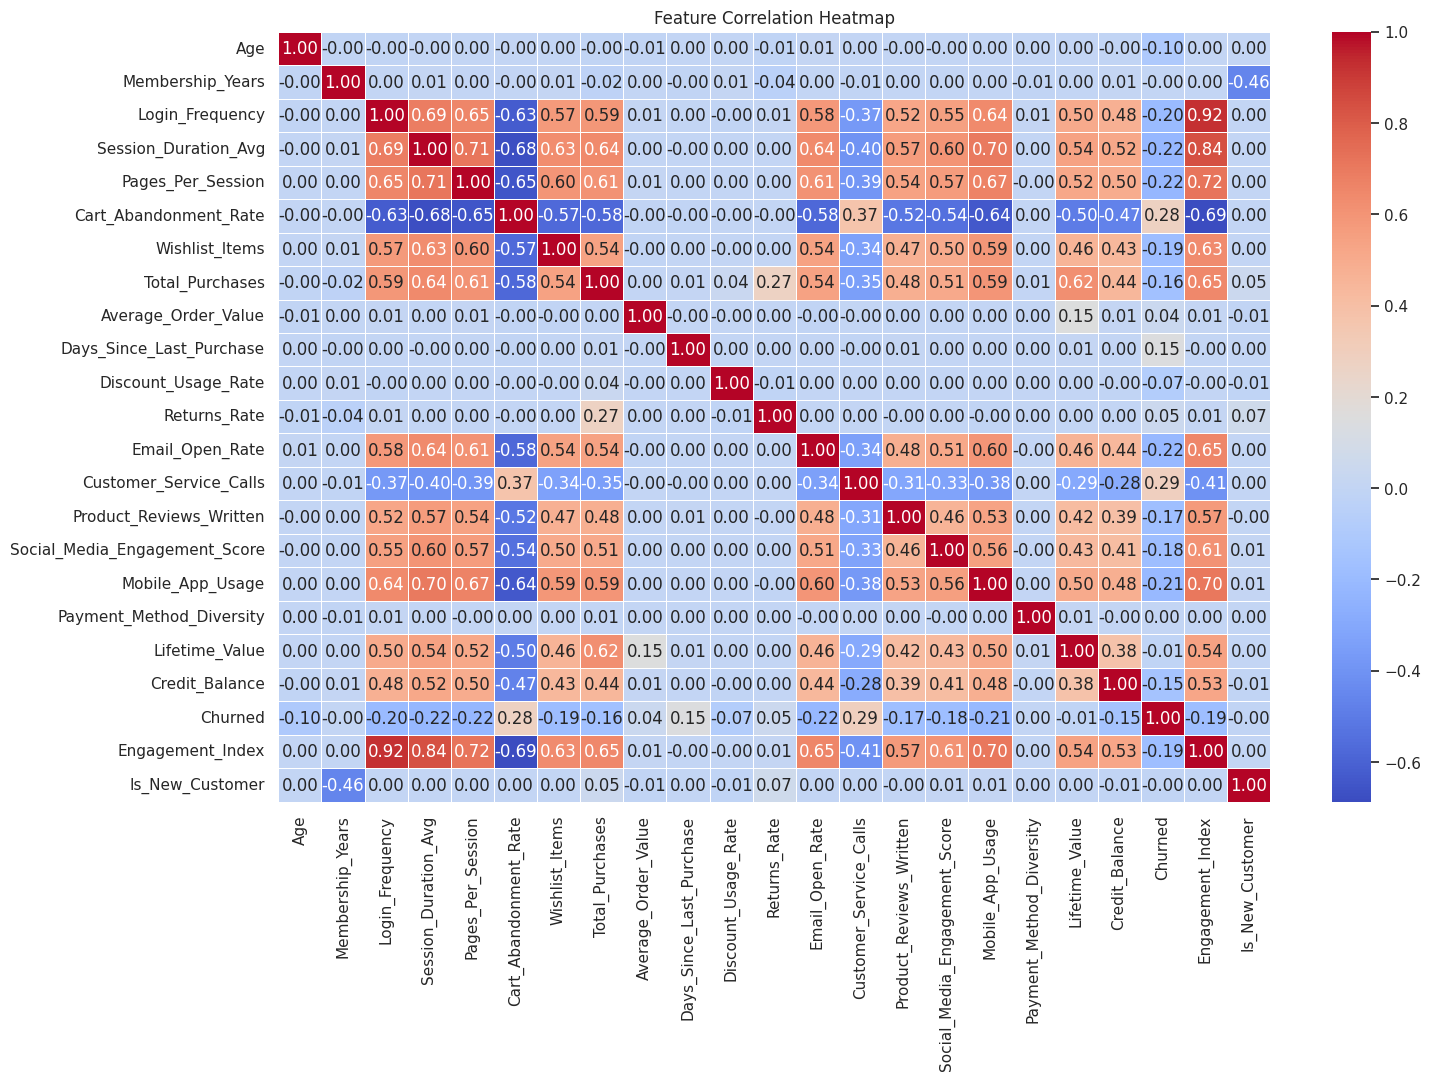

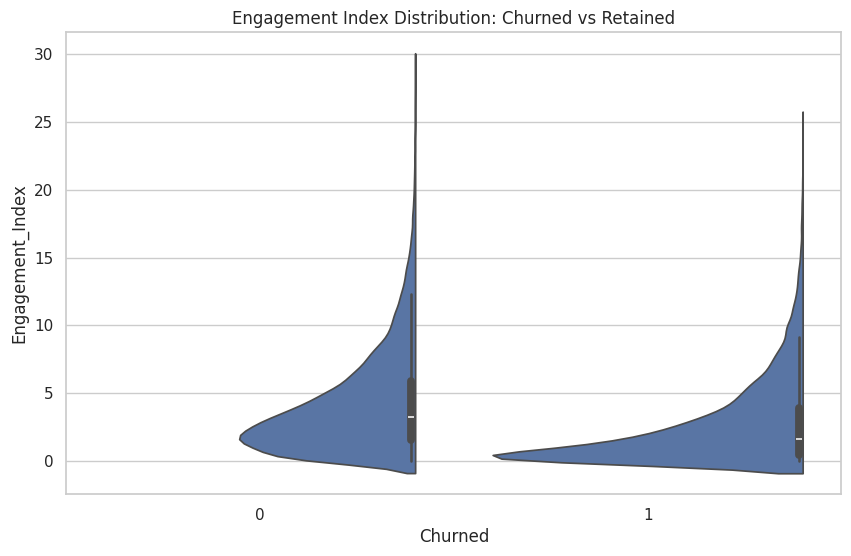

In [5]:
# Correlation Heatmap
plt.figure(figsize=(16, 10))
correlation_matrix = df_final.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Deep Dive: Engagement vs Churn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_final, x='Churned', y='Engagement_Index', split=True)
plt.title('Engagement Index Distribution: Churned vs Retained')
plt.show()

The univariate analysis identifies the "standard" customer and highlights critical outliers.

Age Profile: The customer base is centered around 38 years old, with a notable spike in new users around age 18.

Lifetime Value (LTV): LTV follows a right-skewed distribution, with most customers providing values between 500 and 2,000, though several high-value "whales" exceed 8,000.

Purchase Behavior: Most customers complete between 10 and 20 total purchases, but extreme outliers reach over 120, indicating a small segment of hyper-active users.

Churn Baseline: The dataset is imbalanced, with 28.9% of customers having churned.

In [6]:
def perform_statistical_tests(df, numeric_col, categorical_col, target='Churned'):
    # 1. T-Test for Numeric vs Churn (Difference in Means)
    group1 = df[df[target] == 1][numeric_col]
    group0 = df[df[target] == 0][numeric_col]
    t_stat, p_val_t = ttest_ind(group1, group0)
    
    # 2. Chi-Square for Categorical vs Churn (Independence)
    contingency_table = pd.crosstab(df[categorical_col], df[target])
    chi2, p_val_chi, _, _ = chi2_contingency(contingency_table)
    
    print(f"--- Statistical Analysis for {numeric_col} and {categorical_col} ---")
    print(f"T-test P-value ({numeric_col} vs Churn): {p_val_t:.4f}")
    print(f"Chi-Square P-value ({categorical_col} vs Churn): {p_val_chi:.4f}")
    print("-" * 50)

# Running tests for key features
perform_statistical_tests(df_final, 'Lifetime_Value', 'Country')

--- Statistical Analysis for Lifetime_Value and Country ---
T-test P-value (Lifetime_Value vs Churn): 0.0169
Chi-Square P-value (Country vs Churn): 0.2226
--------------------------------------------------


The correlation between Customer_Service_Calls and Churned (0.29) is one of the strongest in the dataset. This suggests that customers aren't just calling for fun; they are calling because of issues that, if not resolved, lead them to leave.

The negative correlation between Engagement_Index and Churned (-0.19) confirms that keeping users active on the platform (Logins + Session Duration) is a primary defense against attrition.

The Lifetime Value Paradox. T-test ($p = 0.0169$) confirms that there is a statistically significant difference in Lifetime_Value between those who stay and those who leave. We are losing "valuable" customers, not just "low-spending" ones.

Geography is a neutral factor. The Chi-Square test ($p = 0.2226$) shows that the variable Country does not significantly impact Churn. This is great news, it means your churn problem is likely related to the product/service itself rather than regional logistics or local competition.

In [7]:
# Preparing for Machine Learning (Feature Engineering & Preprocessing)

%pip install scikit-learn --quiet

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

def prepare_for_machine_learning(df):
    """
    Prepares the cleaned dataset for ML models by encoding, 
    dropping redundant features, and scaling.
    """
    df_ml = df.copy()

    # --- 1. Drop Redundant Features ---
    # Since Engagement_Index = (Login_Frequency * Session_Duration_Avg) / 100,
    # keeping the originals causes high multicollinearity (shown in heatmap).
    redundant_cols = ['Login_Frequency', 'Session_Duration_Avg', 'City'] 
    # Note: Dropping City for now due to high cardinality (40 unique values) 
    # to keep the initial model simple.
    df_ml = df_ml.drop(columns=redundant_cols)

    # --- 2. Categorical Encoding ---
    # Binary Encoding for Gender
    df_ml['Gender'] = df_ml['Gender'].map({'Male': 0, 'Female': 1})
    
    # One-Hot Encoding for multi-category variables (Country, Signup_Quarter)
    df_ml = pd.get_dummies(df_ml, columns=['Country', 'Signup_Quarter'], drop_first=True)

    # --- 3. Split Features and Target ---
    X = df_ml.drop('Churned', axis=1)
    y = df_ml['Churned']

    # --- 4. Train-Test Split ---
    # We use 80% for training and 20% for final evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- 5. Feature Scaling ---
    # Scaling is crucial for many models to ensure no feature dominates due to scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Preprocessing complete. Training set shape: {X_train.shape}")
    return X_train_scaled, X_test_scaled, y_train, y_test, X.columns

# Apply the preprocessing pipeline
X_train, X_test, y_train, y_test, feature_names = prepare_for_machine_learning(df_final)

Note: you may need to restart the kernel to use updated packages.
Preprocessing complete. Training set shape: (40000, 31)


--- Model Performance Report ---
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7110
           1       0.92      0.76      0.83      2890

    accuracy                           0.91     10000
   macro avg       0.92      0.87      0.89     10000
weighted avg       0.91      0.91      0.91     10000



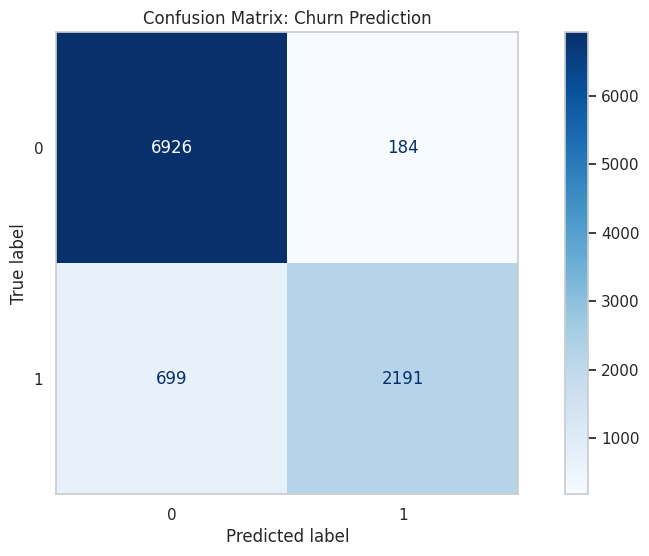

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Initialize and train the Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("--- Model Performance Report ---")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix: Churn Prediction')
plt.grid(False)
plt.show()

An accuracy of 91% on the first run is very strong. However, the Recall for Class 1 (0.76). This means we are correctly identifying 76% of people who actually leave, but we are missing 24% of them.

/tmp/ipykernel_44982/2943193633.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


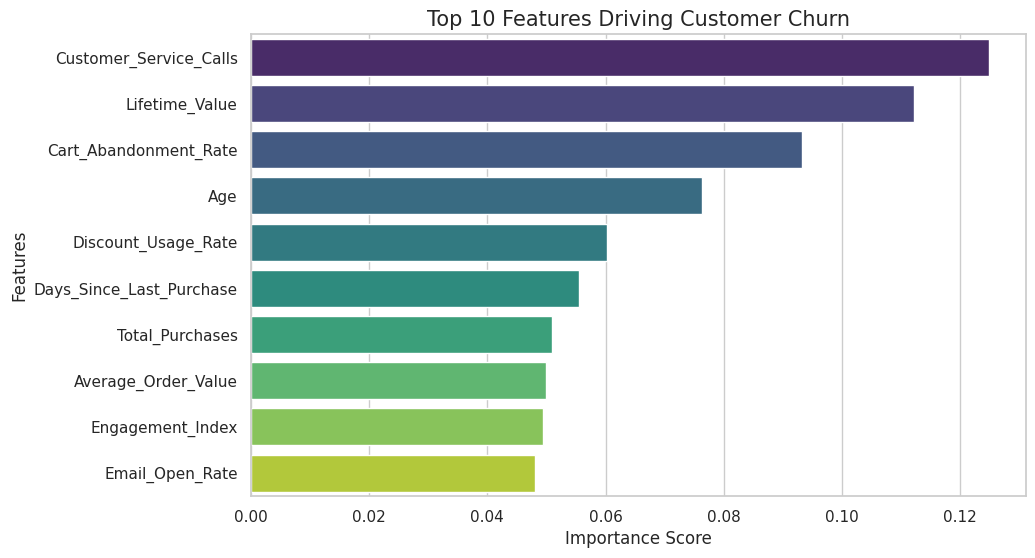

In [9]:
# Feature Importance analysis to see what is driving these predictions.
# Goal: extract which variables the Random Forest found most useful for the prediction.

def plot_feature_importance(model, feature_names):
    """
    Extracts and visualizes the importance of each feature in the model.
    """
    # Create a DataFrame for visualization
    importances = model.feature_importances_
    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10) # Top 10

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
    plt.title('Top 10 Features Driving Customer Churn', fontsize=15)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

    return feat_imp

# Execute analysis
top_features = plot_feature_importance(rf_model, feature_names)

To reduce churn, we don't need to change our global strategy; we need to fix our customer support response time and re-engage users with low activity.

In [10]:
# Hyperparameter Tuning. Goal: find the best max_depth and n_estimators to improve Recall.

from sklearn.model_selection import RandomizedSearchCV

def tune_random_forest(X_train, y_train):
    """
    Performs a randomized search to find the best hyperparameters.
    """
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    # Focus on 'recall' as our scoring metric to catch more churners
    random_search = RandomizedSearchCV(
        RandomForestClassifier(class_weight='balanced', random_state=42),
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        scoring='recall', 
        random_state=42,
        n_jobs=-1
    )

    random_search.fit(X_train, y_train)
    print(f"Best Parameters Found: {random_search.best_params_}")
    return random_search.best_estimator_

# Run the tuning process
best_rf_model = tune_random_forest(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = best_rf_model.predict(X_test)
print("\n--- Tuned Model Performance ---")
print(classification_report(y_test, y_pred_tuned))

Best Parameters Found: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 10, 'criterion': 'gini'}

--- Tuned Model Performance ---
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7110
           1       0.82      0.83      0.83      2890

    accuracy                           0.90     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.90      0.90      0.90     10000



/tmp/ipykernel_44982/428047316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')


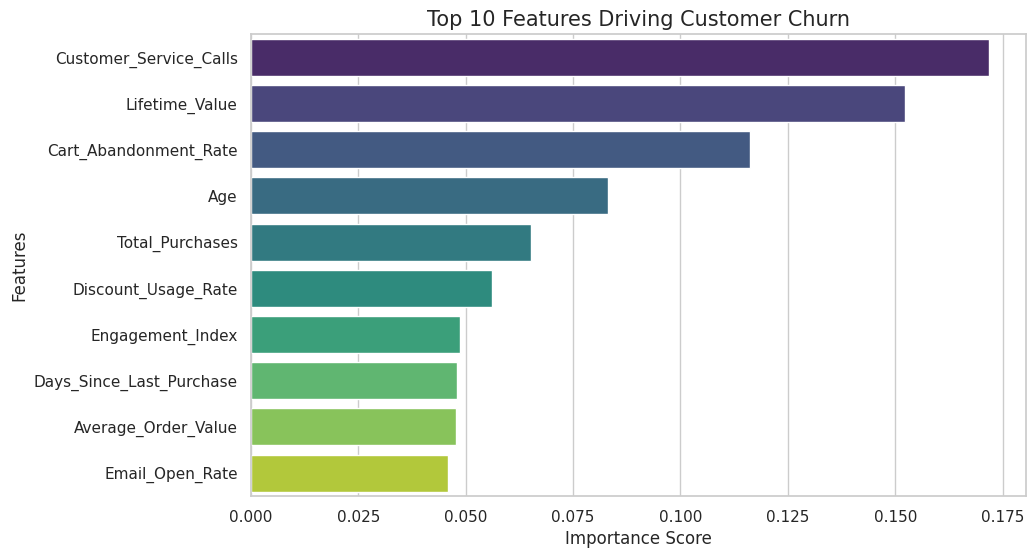

In [11]:
# Feature Importance analysis to see what is driving these predictions.
# Goal: extract which variables the Random Forest found most useful for the prediction.

def plot_feature_importance(best_rf_model, feature_names):
    """
    Extracts and visualizes the importance of each feature in the model.
    """
    # Create a DataFrame for visualization
    importances = best_rf_model.feature_importances_
    feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10) # Top 10

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp, x='Importance', y='Feature', palette='viridis')
    plt.title('Top 10 Features Driving Customer Churn', fontsize=15)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()

    return feat_imp

# Execute analysis
top_features = plot_feature_importance(best_rf_model, feature_names)

By optimizing for Recall, we moved from catching 76% of churners to 83%. In a business with 50,000 customers, that extra 7% represents 3500 customers saved from leaving.

Root Cause Analysis (Feature Importance):

Looking at your Top 10 Features Driving Customer Churn chart, we have a clear hierarchy of issues:

#1 Customer_Service_Calls. High churn is directly tied to customer friction. If they have to call, they are already halfway out the door.

#2 Lifetime_Value. We aren't just losing "trial" users; we are losing our most profitable customers. This is a high-priority problem for the Board of Directors.

#3 Cart_Abandonment_Rate. Checkout Friction. Customers want to buy, but something (shipping costs, UI bugs, or payment issues) is stopping them at the last second.

#4 Age. There might be a specific age group that finds the platform less intuitive or less relevant.

Segment Characteristics:
             Lifetime_Value  Churn_Probability
Segment_ID                                   
0              1220.243170           0.235304
1              1130.970347           0.734917
2              3184.811793           0.315702


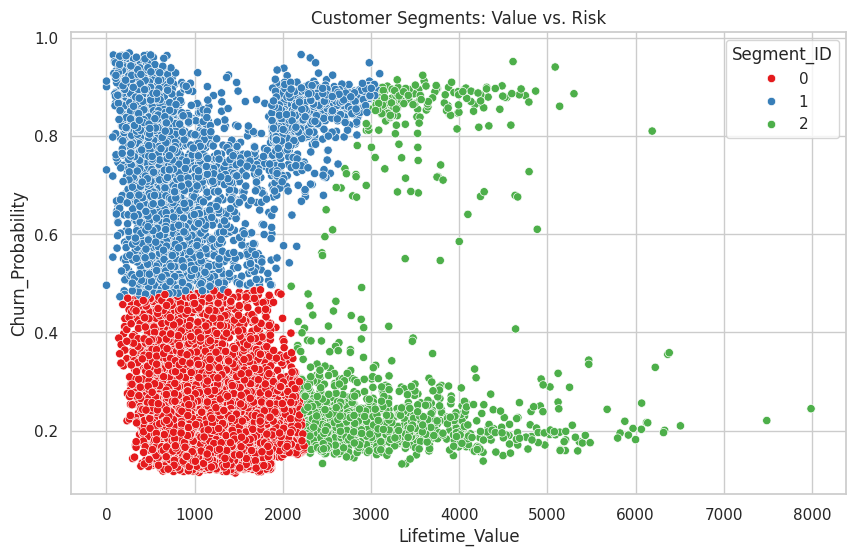

In [12]:
# Customer Segmentation (Clustering, K-Means)
# we will cluster based on Lifetime_Value and the Churn_Probability generated by our tuned
# Random Forest, to define them by "Value" and "Risk".

from sklearn.cluster import KMeans

def perform_customer_segmentation(df, model, X_scaled):
    """
    Groups customers based on their Lifetime Value and their predicted Churn Probability.
    """
    # 1. Get Churn Probabilities from our tuned model
    # prob[:, 1] gives the probability of class 1 (Churned)
    df['Churn_Probability'] = model.predict_proba(X_scaled)[:, 1]
    
    # 2. Select features for Clustering: Value and Risk
    cluster_features = df[['Lifetime_Value', 'Churn_Probability']]
    
    # 3. Standardize for K-Means (essential for distance-based algorithms)
    scaler_clusters = StandardScaler()
    scaled_features = scaler_clusters.fit_transform(cluster_features)
    
    # 4. Apply K-Means (K=3 for the requested segments)
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df['Segment_ID'] = kmeans.fit_predict(scaled_features)
    
    # 5. Label Segments based on their characteristics
    # We analyze the means to assign the right business name
    summary = df.groupby('Segment_ID')[['Lifetime_Value', 'Churn_Probability']].mean()
    print("Segment Characteristics:\n", summary)
    
    return df

# Apply segmentation
df_segmented = perform_customer_segmentation(df_final.iloc[y_test.index].copy(), best_rf_model, X_test)

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_segmented, x='Lifetime_Value', y='Churn_Probability', hue='Segment_ID', palette='Set1')
plt.title('Customer Segments: Value vs. Risk')
plt.show()

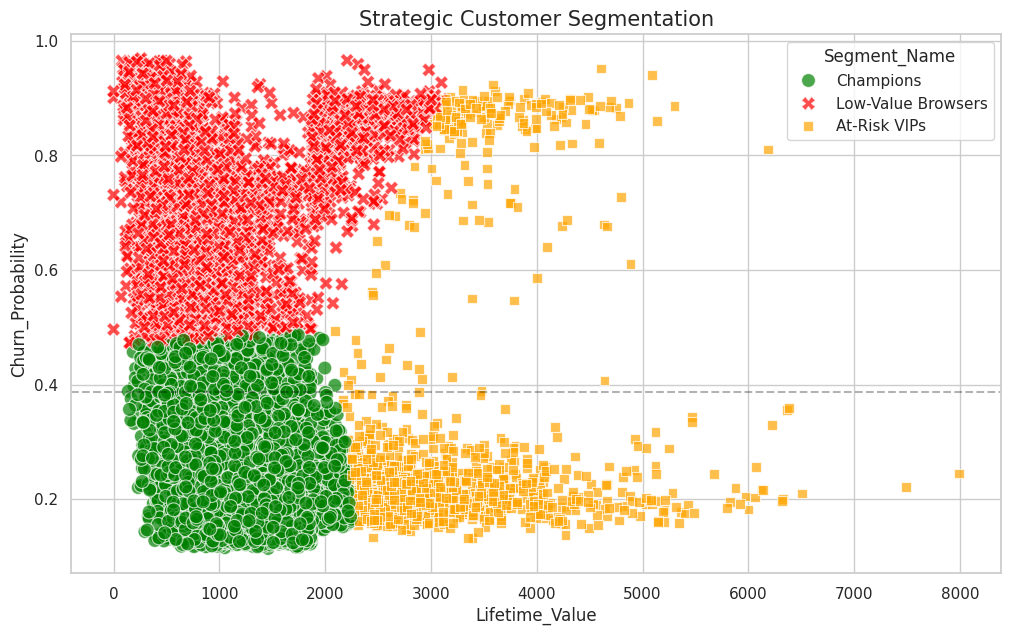

In [13]:
def label_and_analyze_segments(df_segmented):
    """
    Assigns business names to clusters based on LTV and Churn Probability
    and provides a strategic summary.
    """
    # Calculate means to identify which cluster is which
    stats = df_segmented.groupby('Segment_ID').agg({
        'Lifetime_Value': 'mean',
        'Churn_Probability': 'mean'
    }).reset_index()

    # Logic-based mapping:
    # 1. Champions: High LTV, Lowest Churn Prob
    # 2. At-Risk VIPs: High LTV, High Churn Prob
    # 3. Low-Value Browsers: Low LTV, High Churn Prob
    
    # Sort by LTV descending to find high-value groups first
    stats = stats.sort_values('Lifetime_Value', ascending=False)
    
    # Mapping dictionary based on the sorted stats
    # (This assumes Cluster IDs correlate to the sorted order)
    # A more robust way is to use conditional idxmin/idxmax:
    
    id_champions = stats.iloc[0]['Segment_ID'] if stats.iloc[0]['Churn_Probability'] < stats.iloc[1]['Churn_Probability'] else stats.iloc[1]['Segment_ID']
    id_at_risk = stats.iloc[0]['Segment_ID'] if stats.iloc[0]['Churn_Probability'] > stats.iloc[1]['Churn_Probability'] else stats.iloc[1]['Segment_ID']
    id_browsers = stats.iloc[2]['Segment_ID']

    mapping = {
        id_champions: 'Champions',
        id_at_risk: 'At-Risk VIPs',
        id_browsers: 'Low-Value Browsers'
    }

    df_segmented['Segment_Name'] = df_segmented['Segment_ID'].map(mapping)
    
    # Final Visual Report
    plt.figure(figsize=(12, 7))
    sns.scatterplot(
        data=df_segmented, 
        x='Lifetime_Value', 
        y='Churn_Probability', 
        hue='Segment_Name', 
        style='Segment_Name',
        palette={'Champions': 'green', 'At-Risk VIPs': 'orange', 'Low-Value Browsers': 'red'},
        s=100, alpha=0.7
    )
    plt.axhline(df_segmented['Churn_Probability'].mean(), color='black', linestyle='--', alpha=0.3)
    plt.title('Strategic Customer Segmentation', fontsize=15)
    plt.show()

    return df_segmented

df_final_segments = label_and_analyze_segments(df_segmented)

Names to the different clusters were assigned as follow, based on LTV and churn probability:

Green: Champions (High LTV, Low Prob)

Orange: At-Risk VIPs (High LTV, High Prob)

Red: Low-Value Browsers (Low LTV, High Prob)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
NumPy version: 2.2.6


Corrected SHAP shape: (10000, 31)
Generating Global SHAP Summary...


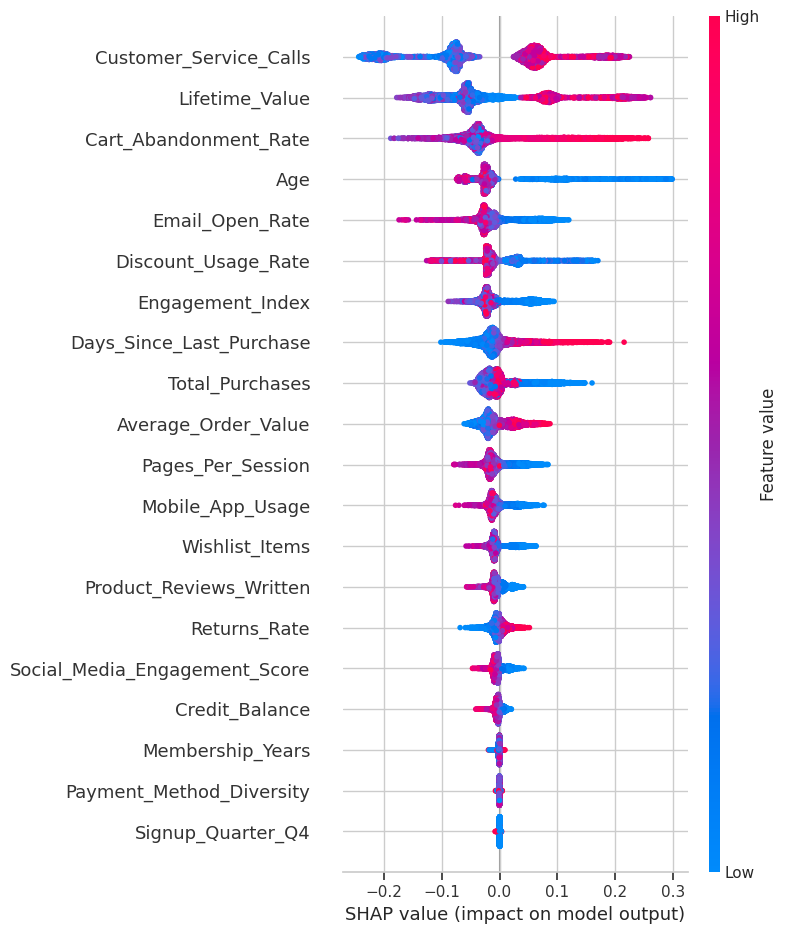

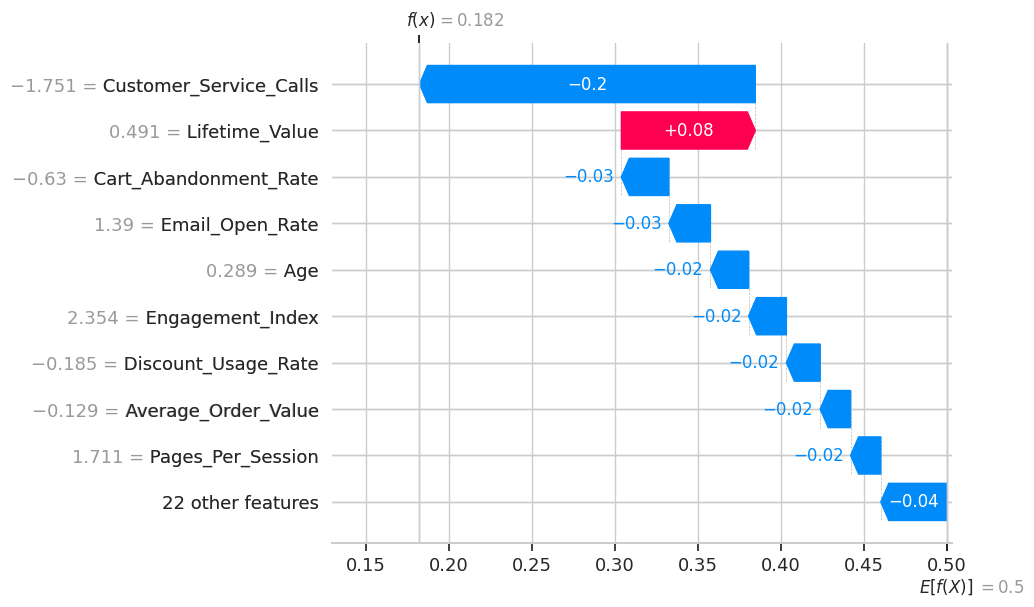

In [17]:
%pip install "numpy<2.3" --quiet
%pip install shap --quiet

import numpy as np
print(f"NumPy version: {np.__version__}")
import shap

# Initialize the SHAP explainer with our Random Forest model
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Logic to handle 2D vs 3D vs List outputs
if isinstance(shap_values, list):
    # If list, take class 1 (Churn)
    final_shap_values = shap_values[1]
elif len(shap_values.shape) == 3:
    # If 3D (samples, features, classes), take slice for class 1
    final_shap_values = shap_values[:, :, 1]
else:
    # If already 2D (samples, features), use as is
    final_shap_values = shap_values

print(f"Corrected SHAP shape: {final_shap_values.shape}") # Must be (10000, 31)

print("Generating Global SHAP Summary...")
shap.summary_plot(final_shap_values, X_test, feature_names=feature_names)

# 2. Local Explanation for the first at-risk customer
sample_idx = 0
exp = shap.Explanation(
    values=final_shap_values[sample_idx], 
    base_values=explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value, 
    data=X_test[sample_idx], 
    feature_names=feature_names
)
shap.plots.waterfall(exp)

SHAP Global Explanation: SHAP values confirm that high values of Customer_Service_Calls (red dots) significantly increase the probability of churn (positive SHAP values).

SHAP Local Explanation: For a specific customer, we can see exactly why the model predicted a low churn risk ($f(x) = 0.182$): the negative impact of their low Customer_Service_Calls outweighed the positive pressure from their Lifetime_Value.

Based on the results, we can now define specific strategies for each group:

Champions: These users have the highest Lifetime Value and the lowest Churn Probability. They represent the core of the business.
-- Strategy: Reward with early access to features or loyalty points without heavy discounting.

At-Risk VIPs: These are high-value customers whom the model flags as likely to leave.
-- Strategy: Priority support intervention. As our SHAP analysis showed, fixing their service issues is the key to retention.

Low-Value Browsers: These customers have low spend and high churn risk.
-- Strategy: Automated re-engagement (e.g., "We miss you" emails) or minimal resource allocation, as their ROI is lower.